# Machine Learning with Tensorflow & Keras

A detailed presentation of machine learning basic techniques can be found at *MachineLearningOverview.pdf* included in the same repository as this notebook.

After analyzing the underlying processes of neural networks with pure Python in the first notebook, it is time to investigate how we can implement machine learning models using *Tensorflow* and *Keras* packages by Google.

This framework is extendendly used for designing neural networks as it provides all the basic and even more complex procedures, so that the developer may concentrate on training without the need of implementing network structures and algorithms from scratch. It also contains valid datasets for various purposes such as image recognition, compression and more. In this way, the designer can solely focus on the underlying task and the learning process.

You can explore *Tensorflow* at: https://www.tensorflow.org/

Let us import the necessary frameworks in order to train a simple neural network with *Keras*.

In [1]:
# hide tensorflow warnings on GPU execution (we will use CPU)
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

# the neural network class
from tensorflow.keras import Sequential
# the standard network layer (fully-connected)
from tensorflow.keras.layers import Dense

import numpy as np
import time

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150 # for higher resolution when displaying content

We define a network with 2 hidden layers as shown below:

In [2]:
# define ANN
net = Sequential()

net.add(Dense(20, input_shape=(1,), activation='sigmoid')) # 1 input neuron and first hidden layer with 20 neurons
net.add(Dense(10, activation='sigmoid')) # second hidden layer with 10 neurons
net.add(Dense(1, activation='linear')) # output layer with 1 neuron

# compile network (randomly initialize weights, choose advanced optimizer, set up everything!)
# use MSE cost function and 'adam' optimizer which has adaptive learning rate - better thatn SGD
# 'adam' has a default upper limit for learning rate of 0.001
net.compile(loss='mse', optimizer='adam')

Now, we will use this network to reproduce a 1D wave packet function as defined below:
$$ f(x) = \frac{\sin x}{1+x^2} $$

In [3]:
def wave(x):
    return( np.sin(x)/(1+x**2) )

Let's train this network. With more iterations we can achieve higher accuracy. Watch this simple animation below and see how the network behaves in each training round.

In [4]:
# import functions for updating display 
# (simple animation)
from IPython.display import clear_output
from time import sleep

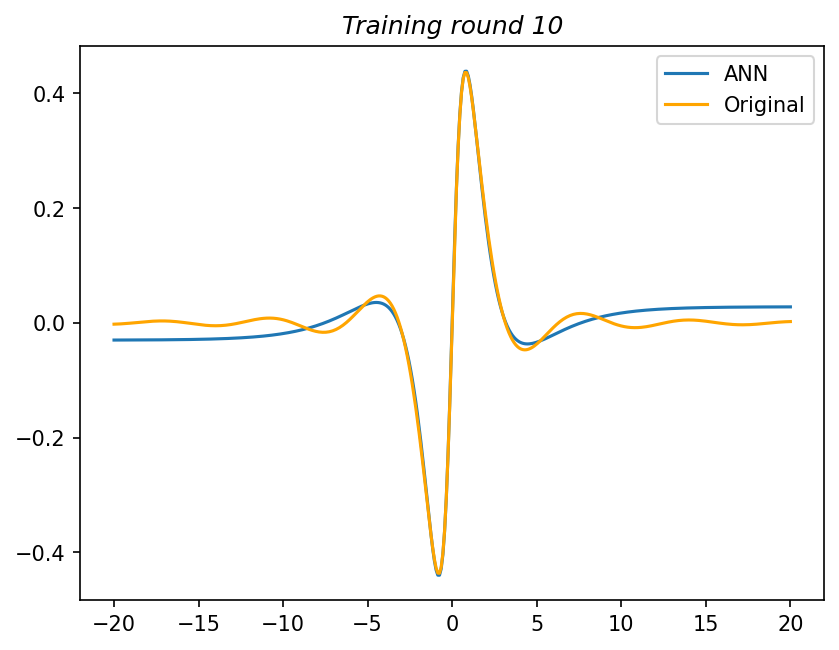

Running time for 10 iterations: --------74.04947304725647 seconds--------


In [5]:
# calculate running time (not the same on all CPUs !)
start_time = time.time()

# number of training batches
batches = 1000
batchsize = 20

# store costs
costs = np.zeros(batches)

# number of iterations of training
iterations = 10

for i in range(iterations):
    # loop through all training batches
    for j in range(batches):
        # create randomly scattered points (uniform distribution)
        x_in = np.random.uniform(low=-10.0, high=+10.0, size=[batchsize,1])
        # produce target outputs
        y_target = wave(x_in)
        # train on this batch of samples
        costs[j] = net.train_on_batch(x_in, y_target)
        print(str(costs[j]),end="   \r") # print current cost function, overwrite line always
    
    # plot the output and the original function
    N = 400 # number of points
    x_in = np.zeros([N,1]) # prepare correct shape for network, here N becomes the batch size
    x_in[:,0] = np.linspace(-20.0, 20.0, N) # fill with interval
    y_out = net.predict_on_batch(x_in) # apply the network to this set of points!
    
    clear_output(wait=True)

    # plot
    plt.title(f"Training round {i+1}", style='italic')
    plt.plot(x_in, y_out, label="ANN")
    plt.plot(x_in, wave(x_in), color="orange", label="Original")
    plt.legend()
    plt.show()
    sleep(0.1)
    
print(f"Running time for {iterations} iterations: --------{time.time() - start_time} seconds--------")